# 1 Describe

This database lists all agreements included on the main PA-X database that deal in some way with local issues, in cases of local negotiation practices that are on the margins of wider conflict, or in cases of local/communal violent conflict. Agreements are collected from 1990 to 2020, with global coverage. This collection stems from the work on the main PA-X database and is not exhaustive of all local negotiation practices, since it only brings together documents which are written, formally agreed, and publicly available.

The general type of this database is standardized tabular data. The total data contains 286 rows, 55 columns, and a total of 15,730 pieces of data (including some empty data). The part I was responsible for analyzing was the Mediator in the agreement, involving 286 rows, 8 columns and a total of 2288 pieces of data.

Data structure is first listed as Mediator, which is Character Variable(Text), listing the mediator, facilitator, convenor of the talks that produced the agreement. If there is there is no information listed in the agreement, but other research with secondary literature indicates who the mediator or similar was, this also is recorded. The last seven columns of data are the categories for Mediator(Binary representation). They are Central state actor, Regional state actor, Local state actor, Local armed group actor, Domestic religious organisation/leader or other elder, Local community/civilian group(s)/civil society organisations, International or transnational actor and Other or unknown type of actor.In addition to the data mentioned above, I will also use Time (date form), Region (Text) and Grievances(Binary representation) data.

The detailed database covers 25 countries in the Asia-Pacific region, Middle East and North Africa, Europe and Eurasia, Africa（excl MENA） and Cross-regional five regions, with a total of about 286 agreements between 1990 and 2020.

This analysis focuses on this database and does not link to other data.

At the beginning, the data owners discussed visualization of the peace Agreements with us. After discussing them, we found that the 'Local Agreements' Database（https://www.peaceagreements.org/lsearch） is a new element of the peace Agreements and has not been visualized. Therefore, we select this database and analyze it separately. Finally, we will form a visual analysis report.

In this Assignment, First Of all, I will show the distribution of mediator type, the distribution of agreement time and the distribution of agreement region respectively. Then, I will mainly explore the relationship between time, region and people's grievances and mediator type, then propose some possible hypotheses, and finally conduct reflection.

# 2 Data preparation

This section contains Data import and cleaning.

## 2.1 Data import

In [88]:
# Necessary import
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

In [89]:
# Read in the data
fileNameStr = 'pax_local_all_agreements_data(1).csv' 
#To prevent some data distortion, the data type is changed to a string when the data is imported here.
DataDF = pd.read_csv(fileNameStr,encoding = "ISO-8859-1",dtype = str) 
# Have a look at it
DataDF.head()

,ï»¿Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
0,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1210,1,Decisions on Mostar of 12 February 1997,1997-02-12,Multiparty signed/agreed,...,1,0,0,0,1,0,0,1,0,1
1,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1644,1,Agreement on the disarmament of the able-bodie...,1995-07-24,Multiparty signed/agreed,...,0,0,0,1,1,1,0,0,0,0
2,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1850,1,Agreement,1994-03-04,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,0
3,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1297,1,Declaration,1993-10-22,Multiparty signed/agreed,...,0,1,0,0,1,0,0,0,0,0
4,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1569,1,Joint Statement,1993-10-21,Multiparty signed/agreed,...,0,1,0,0,0,0,0,0,0,0


In [90]:
#Size of data
DataDF.shape

(286, 55)

## 2.2 Cleaning

In [91]:
DataDF.info()
#Know more about column missing data, especially Mediator, where I needed analysis
DataDF.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿Con           286 non-null    object
 1   Contp            286 non-null    object
 2   PP               286 non-null    object
 3   PPName           286 non-null    object
 4   Reg              286 non-null    object
 5   AgtId            286 non-null    object
 6   Ver              286 non-null    object
 7   Agt              286 non-null    object
 8   Dat              286 non-null    object
 9   Status           286 non-null    object
 10  Lgt              286 non-null    object
 11  N_characters     286 non-null    object
 12  Stage            286 non-null    object
 13  StageSub         280 non-null    object
 14  Part             283 non-null    object
 15  ThrdPart         145 non-null    object
 16  OthAgr           70 non-null     object
 17  Loc1ISO          286 non-null    ob

PamAgr             286
UcdpAgr            285
Loc2GWNO           272
Loc2ISO            272
CowWar             248
OthAgr             216
ThrdPart           141
Mediator           120
UcdpCon             72
LocaleName          16
LinkNatProcess      13
StageSub             6
Part                 3
N_characters         0
Loc1GWNO             0
Contp                0
PP                   0
PPName               0
Reg                  0
AgtId                0
Ver                  0
Agt                  0
Stage                0
Dat                  0
Loc1ISO              0
Status               0
Lgt                  0
PT_FSP               0
Cover                0
PT_IPP               0
PT_ISP               0
MedOtherUnclear      0
Grieve               0
RitPray              0
OthActor             0
IntActor             0
LocComSoc            0
ReDomEld             0
LocArmedGr           0
LocState             0
RegState             0
CentState            0
MedIntActor          0
Cattle     

I find Mediator had 120 missing data, but Mediator's category didn't have any missing data and there is also no missing data for the Dat(time), Reg(region) and Grieve(grievances) I will use. 

In [92]:
DataDF.rename(columns={'ï»¿Con':'Con'},inplace=True)

The first column name appears the garbled code, makes the modification

In [93]:
#Look at the data for Mediator and Type of mediator
DataDF.loc[:, ['Mediator', 'MedIntActor','MedLocCivSoc','MedReDomEld','MedLocArmed','MedLocState','MedRegState','MedCentState','MedOtherUnclear']]

,Mediator,MedIntActor,MedLocCivSoc,MedReDomEld,MedLocArmed,MedLocState,MedRegState,MedCentState,MedOtherUnclear
0,The meeting was chaired by the Principal Deput...,1,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0
3,Listed in the agreement as 'Witness to the agr...,1,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
281,A Presidential Committee is described as havin...,0,0,0,0,0,0,0,0
282,NaN,0,0,0,0,0,0,0,0
283,"Page 1, 2. ... The signatures of the parties t...",0,0,0,0,0,0,0,0
284,NaN,0,0,0,0,0,0,0,1


I see from the above data that if Mediator is NaN, the next Mediator's categor is 0, which doesn't mean anything to the analysis.So I'm going to delete if Mediator is NaN.

In [94]:
#Remove any NaN rows in Mediator columns
SubDataDF = DataDF.dropna(subset=['Mediator'])

In [95]:
#Used assertsions to check my data cleaning results
for item in SubDataDF.itertuples():
    assert len(item.Mediator) > 0 , 'There are also null values'

In [96]:
#Change the string to int and used assertsions to check my data cleaning results
Mediator_categor = ['MedIntActor','MedLocCivSoc','MedReDomEld','MedLocArmed','MedLocState','MedRegState','MedCentState','MedOtherUnclear']
for column_name in Mediator_categor:
    SubDataDF[column_name] = SubDataDF[column_name].astype('int')
    for i in SubDataDF[column_name]:
        assert i <= 1 and i >= 0 ,'There are numbers that are not binary'
        assert isinstance(i,int) ,'There are string data'


<ipython-input-96-5814f23eb8a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SubDataDF[column_name] = SubDataDF[column_name].astype('int')


In [97]:
#Check the Dat, Reg and Grieve
SubDataDF['Dat']
for item in SubDataDF.Dat:
    assert time.strptime(item, "%Y-%m-%d"), 'There is an error in Dat'
SubDataDF['Reg']
for item in SubDataDF.Reg:
    assert item in ['Asia and Pacific', 'Middle East and North Africa', 'Europe and Eurasia', 'Africa (excl MENA)','Cross-regional'],'There is an error in Dat'


Grievances= 'Grieve'
SubDataDF[Grievances] = SubDataDF[Grievances].astype('int')
for i in SubDataDF['Grieve']:
    assert i <= 1 and i >= 0 ,'There are numbers that are not binary'
    assert isinstance(i,int) ,'There are string data'

<ipython-input-97-67e6efda1ee2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SubDataDF[Grievances] = SubDataDF[Grievances].astype('int')


AssertionError: There are numbers that are not binary

As I did the assertion test, I found out that I had some non-binary data in Grieve because I wasn't sure what the original data was, so I chose to just delete the line where the data was.

In [98]:
for item in SubDataDF.itertuples():# Iterate over all the data for data
    if item.Grieve> 1: #Find the wrong data
        SubDataDF = SubDataDF.drop(item.Index)# Delete the error data and save it in the new Dataframe  
for i in SubDataDF['Grieve']:
    assert i <= 1 and i >= 0 ,'There are numbers that are not binary'

Now, I've cleaned and checked all the data I need.

# 3 Data Explore

## 3.1 Number of Mediator in different Type

In [99]:
column_name1= ['MedCentState','MedRegState','MedLocState','MedLocArmed','MedReDomEld','MedLocCivSoc','MedIntActor','MedOtherUnclear']
def data_count(column_name):
    dic = {}
    for i in column_name:
        a = 0
        a = SubDataDF[i].value_counts()[1]
        b = {i : a}
        dic.update(b)
    return dic
dic_Mediator_count = data_count(column_name1)
print(dic_Mediator_count)
x = list(dic_Mediator_count.keys())
y = list(dic_Mediator_count.values())

{'MedCentState': 31, 'MedRegState': 14, 'MedLocState': 9, 'MedLocArmed': 10, 'MedReDomEld': 54, 'MedLocCivSoc': 27, 'MedIntActor': 68, 'MedOtherUnclear': 4}


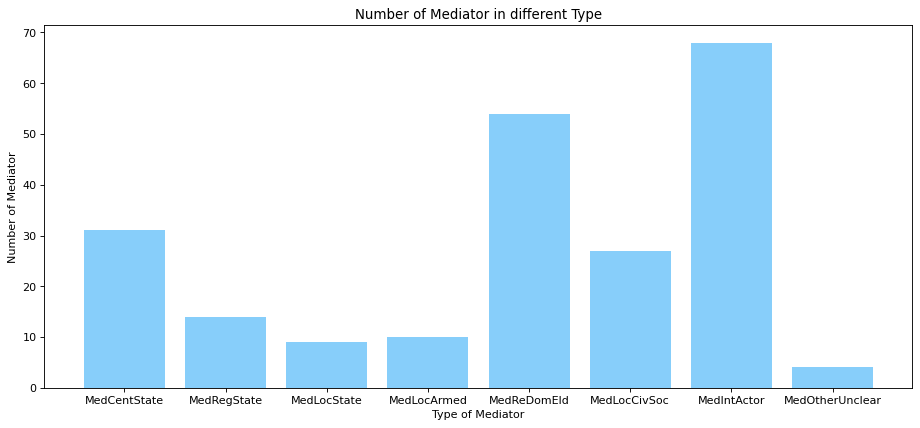

In [100]:
plt.figure(figsize=(14, 6),dpi=80)
plt.subplot(1, 1, 1)
plt.xlabel('Type of Mediator')
plt.ylabel('Number of Mediator')
plt.title('Number of Mediator in different Type')
plt.bar(x,y,color="#87CEFA")
plt.show()


# MedIntActor: Mediator – International or transnational actor
# MedLocCivSoc: Mediator – Local community/civilian group(s)/civil society organisations
# MedReDomEld: Mediator – Domestic religious organisation/leader or other elder
# MedLocArmed: Mediator – Local armed group actor 
# MedLocState: Mediator – Local state actor 
# MedRegState: Mediator – Regional state actor
# MedCentState: Mediator – Central state actor
# MedOtherUnclear: Mediator – Other or unknown type of actor

The diagram is the distribution of the number of different types of mediators. I use the histogram form, because it can be intuitively seen which type of mediators has the largest number of peace agreements between 1990 and 2020 in the world. It can be found that International or transnational actors are the most numerous(about 70), while Other or unknown types of actors are the least(about 5).It may be explained that people are more inclined to International or Transnational actors as mediators.

## 3.2 Number of agreements over time (excluding some agreements without a mediator)

In [101]:
# Change to time format
SubDataDF["Dat"] = pd.to_datetime(SubDataDF["Dat"],format ="%Y/%m/%d")
# Use. Groupby () to calculate how many agreements there are per year
Time_count = SubDataDF.groupby(SubDataDF["Dat"].apply(lambda x:x.year)).count()
Time_count

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
Dat,,,,,,,,,,,,,,,,,,,,,
1991,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1992,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1993,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1997,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1999,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2002,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


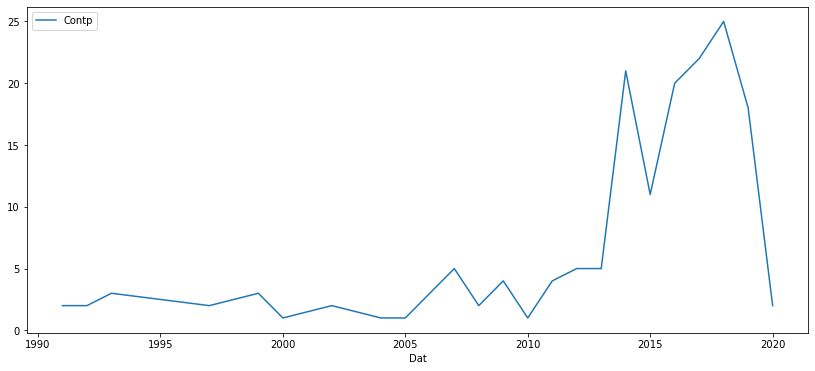

In [102]:
# Since each column is the same after counting, I chose one column at random and plotted it.
Time_count.plot(y = 'Contp',figsize =(14,6))
plt.legend(loc="upper left")
plt.show()

This database has the data of 2020, but it does not have complete statistics, so the data of 2020 is relatively small. Drawing together will affect the analysis, so I choose to remove the data of 2020 and redraw the graph, which may be more intuitive.

In [103]:
#Remove data of 2020
Time_count_new = Time_count.drop([2020])
#Get the mean value
Time_count_new_mean = Time_count_new['Contp'].describe()
mean = Time_count_new_mean.loc['mean']
Time_count_new_mean

count    23.000000
mean      7.086957
std       7.971044
min       1.000000
25%       2.000000
50%       3.000000
75%       8.000000
max      25.000000
Name: Contp, dtype: float64

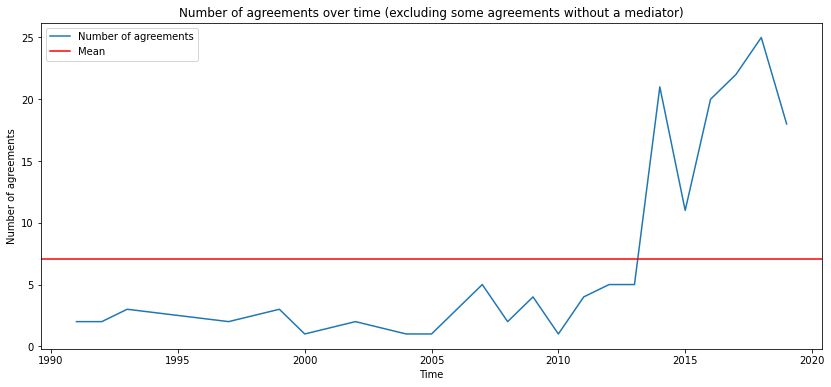

In [104]:
Time_count_new.plot(y = 'Contp',figsize =(14,6),title = 'Number of agreements over time (excluding some agreements without a mediator)',label="Number of agreements")
plt.xlabel('Time')
plt.ylabel('Number of agreements')
plt.axhline(y=mean, color='r', linestyle='-',label="Mean")
plt.legend(loc="upper left")
plt.show()

As can be seen from the chart above, more and more peace agreements have been signed over time, especially after 2013, the number of peace agreements has surged(The red lines represent the mean). What is the reason for this? Why was there a sharp drop in 2015 and what happened?Where is this growth specifically reflected and is it directly related to the mediator? This is something that comes up when I see this data, I talk about the test methods on Hypotheses.

## 3.3 Number of agreements in different regions(excluding some agreements without a mediator)

In [105]:
# Use. Groupby () to calculate how many agreements there are per year
Reg_count = SubDataDF.groupby(SubDataDF["Reg"]).count()
Reg_count

,Con,Contp,PP,PPName,AgtId,Ver,Agt,Dat,Status,Lgt,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
Reg,,,,,,,,,,,,,,,,,,,,,
Africa (excl MENA),103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
Europe and Eurasia,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Middle East and North Africa,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55


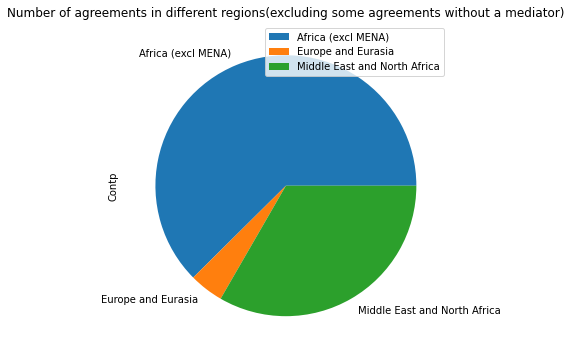

In [106]:
Reg_count.plot(kind = 'pie',y = 'Contp',title = 'Number of agreements in different regions(excluding some agreements without a mediator)',figsize =(14,6))
plt.legend(loc="upper right")
plt.show()

As can be seen from the figure above, peace agreements with intermediary mediators are mainly in Africa (Excl MENA) with 63%, followed by Middle East and North Africa with 33%, and Europe and Eurasia with only 7 peace agreements.

Next I tried to go further and show the distribution of the peace agreement in more detail on the map??

## 3.4 People's Grievances about agreement

In [107]:
Grieve_SubDataDF= SubDataDF['Grieve'].value_counts()
SubDataDF['Grieve'].value_counts()
Grieve_SubDataDF = Grieve_SubDataDF.rename({0: 'Non-Grievances ', 1:'Grievances ' }, axis='index')

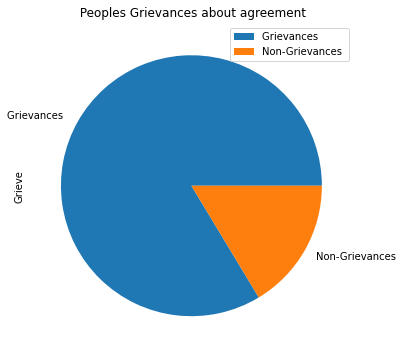

In [108]:
Grieve_SubDataDF.plot(kind = 'pie',title = ' Peoples Grievances about agreement',figsize =(14,6))
plt.legend(loc="upper right")
plt.show()

It is not hard to see that people do not recognise the peace agreements, with more than 80% complaining about the agreements already signed. I will try to find the relationship between surged and Mediator Types later.

## 3.5 The relationship between Region and Mediator type

I guess different regions will have different choices of mediators. I hope to combine the analysis of regions and mediators.

In [109]:
#Get the number of agreements corresponding to different types of mediators in each region
A_count = []
column_name1= ['MedCentState','MedRegState','MedLocState','MedLocArmed','MedReDomEld','MedLocCivSoc','MedIntActor','MedOtherUnclear']
for i in SubDataDF.groupby('Reg'):
    for j in column_name1:
        a = sum((i)[1][j])
        A_count.append(a)
Africa_excl_MENAB_count= A_count[0:8]
Europe_and_Eurasia_count = A_count[8:16]
Middle_East_and_North_Africa_count = A_count[16:24]

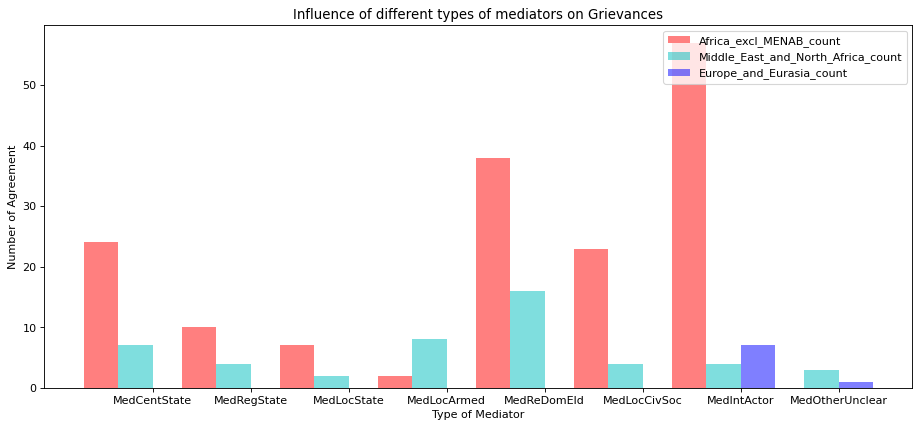

In [110]:
plt.figure(figsize=(14, 6),dpi=80)
plt.subplot(1, 1, 1)
plt.xlabel('Type of Mediator')
plt.ylabel('Number of Agreement')
plt.title('Influence of different types of mediators on Grievances')
t = np.arange(8)
tick_label = ['MedCentState','MedRegState','MedLocState','MedLocArmed','MedReDomEld','MedLocCivSoc','MedIntActor','MedOtherUnclear']
bar_width = 0.35
plt.bar(t-bar_width,Africa_excl_MENAB_count, bar_width, align="center", color="r",label = 'Africa_excl_MENAB_count',alpha=0.5)
plt.bar(t,Middle_East_and_North_Africa_count, bar_width, align="center", color="c", label = 'Middle_East_and_North_Africa_count',alpha=0.5)
plt.bar(t+bar_width, Europe_and_Eurasia_count, bar_width, color="b", align="center",label = 'Europe_and_Eurasia_count',alpha=0.5)
plt.xticks(t+bar_width/2, tick_label)
plt.legend(loc="upper right")
plt.show()

As the chart above shows, it is easy to see that different regions do tend to have different types of Mediators. In Europe and Eurasia and Africa (Excl MENA), InterNational or Transnational Actors are preferred as mediators;However, In the Middle East and North Africa, Domestic religious organisations/leaders or other elder are more often used as mediators of conflicts.

In [111]:
#
SubDataDF_Con = SubDataDF['Con'].reset_index()
SubDataDF_Con['Con']
Con_list = []
for i in SubDataDF_Con['Con']:
    i = i.split("/")
    i = i[0].split("and")
    if len(i)>1:
        Con_list.append(i[0])
        Con_list.append(i[1])
    Con_list.append(i[0])
print(Con_list)
Con_SubDataDF = pd.DataFrame(Con_list, columns=['Con']) 
Con_SubDataDF_Hot = Con_SubDataDF['Con'].value_counts().reset_index()
Con_list_Hot=[]
for j in Con_SubDataDF_Hot['index']:
    Con_list_Hot.append(j)
print(Con_list_Hot)

Con_SubDataDF_Hot.rename(columns = {'index':'Country Name'})

Con_list_Hot2=[]
for z in Con_SubDataDF_Hot['Con']:
    Con_list_Hot2.append(z)
print(Con_list_Hot2)

['Bosnia ', ' Herzegovina', 'Bosnia ', 'Bosnia ', ' Herzegovina', 'Bosnia ', 'Bosnia ', ' Herzegovina', 'Bosnia ', 'Bosnia ', ' Herzegovina', 'Bosnia ', 'Burundi', 'Burundi', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Croatia', 'Croatia', 'Croatia', 'Democratic Republic of Congo', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Ethiopia', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Lebanon', 'Libya', 'Libya', 'Libya', 'Libya', 'Libya', 'Libya', 'Libya', 'Libya', 'Libya', 'Mali', 'Mali'

This part is to clean the data in the country column, because this part was tried later, so it was not included in the initial data cleaning. I removed some former names in the country and some state names in the country here, and then got the names of all countries.

You need to install Geopy，Nominatim，Pyproj and Basemap here

In [112]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myuseragent')
latitude_list=[]
longitude_list=[]
for i in Con_list_Hot:
    loc = geolocator.geocode(i)
    latitude_list.append(loc.latitude)
    longitude_list.append(loc.longitude)

In [113]:
print(latitude_list)
print(longitude_list)

National_coordinates={"Country Name" : Con_list_Hot,"Latitude" : latitude_list,'Longitude':longitude_list}
National_coordinates= pd.DataFrame(National_coordinates)


[7.8699431, 34.6401861, 16.3471243, 7.0323598, 16.3700359, 1.4419683, 10.2116702, 26.8234472, 9.6000359, 44.3053476, 8.3676771, -33.4274424, 45.5643442, -3.3634357, 33.8750629, -2.9814344, 14.5844444, 17.7356214]
[29.6667897, 39.0494106, 47.8915271, 19.9981227, -2.2900239, 38.4313975, 38.6521203, 18.1236723, 7.9999721, 17.5961467, 49.083416, -70.7395684, 17.0118954, 29.8870575, 35.843409, 23.8222636, 29.4917691, 9.3238432]


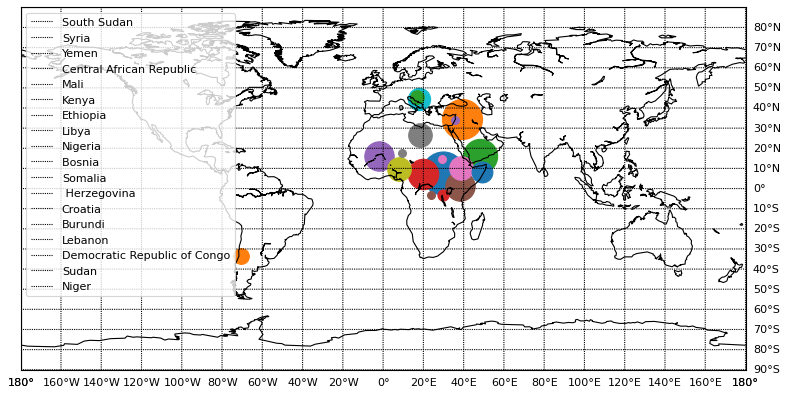

In [114]:
plt.figure(figsize=(14, 6),dpi=80)
plt.subplot(1, 1, 1)
points_tulpe = list(zip(Con_list_Hot,longitude_list,latitude_list,Con_list_Hot2))
m = Basemap()
for a,i,j,z in points_tulpe:
    lon, lat = m(i,j) 
    m.scatter(i, j,s=z*50,label=a)            
m.drawcoastlines()
m.drawmapboundary(fill_color='white')  
parallels = np.arange(-90., 90., 10.)
m.drawparallels(parallels,labels=[False, True, True, False])
meridians = np.arange(-180., 180., 20.) 
plt.legend(Con_list_Hot,loc="upper left")
m.drawmeridians(meridians,labels=[True, False, False, True])
plt.show()


By counting the agreements between countries, we get the number of agreements for each country, and we get the latitude and longitude of each country, and then it shows up on the world map, the more the number, the bigger the circle, and we can see that most of the agreements are in Africa. This map is in a hurry, so there are still many areas to be improved. For example, I plan to improve the legend section later. It is just an attempt, hoping to make a more detailed map.

## 3.6 The relationship between Grievances and Mediator type

I would like to look specifically at the relationship between Grievances and the Mediator and whether there is an increase in dissatisfaction due to different Mediators.

In [115]:
column_name1= ['MedCentState','MedRegState','MedLocState','MedLocArmed','MedReDomEld','MedLocCivSoc','MedIntActor','MedOtherUnclear']
Grieve_count = []
for i in column_name1:
    Grieve_count.append(SubDataDF.groupby([i,'Grieve'])[i].agg('count').rename()[1][1])
print(Grieve_count)
dic_Mediator_count = data_count(column_name1)
x1 = list(dic_Mediator_count.keys())
y1 = list(dic_Mediator_count.values())
y1_np = np.array([y1])
Grieve_count_np = np.array([Grieve_count])
Grievances_rate = Grieve_count_np/y1_np
Grievances_rate_list= Grievances_rate.tolist()

[25, 12, 9, 10, 49, 22, 52, 4]


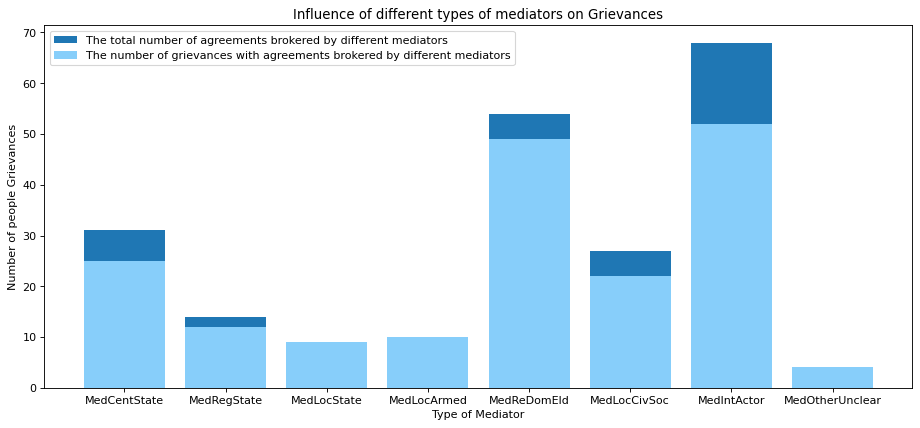

In [116]:
x = column_name1
y = Grieve_count
plt.figure(figsize=(14, 6),dpi=80)
plt.subplot(1, 1, 1)
plt.xlabel('Type of Mediator')
plt.ylabel('Number of people Grievances')
plt.title('Influence of different types of mediators on Grievances')
p1 = plt.bar(x1,y1,label="The total number of agreements brokered by different mediators")
p2 = plt.bar(x,y,color="#87CEFA",label='The number of grievances with agreements brokered by different mediators')
plt.legend(loc="upper left")
plt.show()

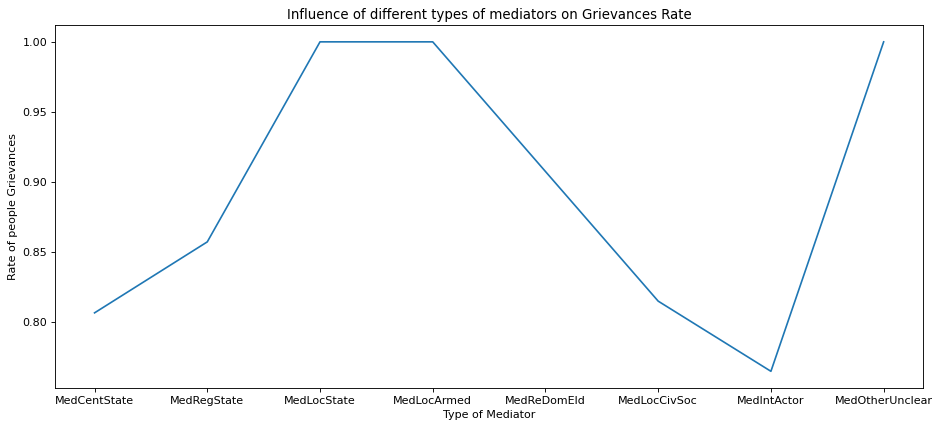

In [117]:
plt.figure(figsize=(14, 6),dpi=80)
plt.xlabel('Type of Mediator')
plt.ylabel('Rate of people Grievances')
plt.title('Influence of different types of mediators on Grievances Rate')
p3 = plt.plot(x,Grievances_rate_list[0])
plt.show()

It can be seen from the figure that the types of mediators do have a certain impact on people's grievances about the agreements. For example, the satisfaction degree and grievances rate of mediators from International or Transnational Actors are the highest and lowest, but it also reaches more than 75%, so the impact may not be very great.

# 4 Hypotheses

## Hypotheses1：

As I described in 3.2, there has been a surge in the number of peace agreements since 2013, whether it is due to increased awareness of peace or the overall number of conflicts. I am not sure.But I think if I can get data on the number of conflicts in the world, I can do a comprehensive analysis to get the answer.

As for the regions where the number of agreements will increase after 2013, the results can be obtained by joint analysis with the regional data. It is difficult to find out whether there is a relationship with the Mediator, and I have not yet come up with an appropriate plan. 

In the end, I'm actually more interested in the 2020 Data, because I want to know if COVID-19 is going to have an impact on the peace agreement, is it going to go down or up? If it's a decline, it may be because COVID-19 is making so many people sick that there is less conflict. However, I also think maybe the Numbers are going up because of the tension of medical supplies leading to frequent conflicts and escalation, or it could be a dynamic process. These can only be found in 2020 when the data are fully counted. I think this may be a direction for our future research.

## Hypotheses2：

As discussed in 3.5, it is speculated that the choice of mediator types may also be influenced by national culture, people's behavior or state of national government. For example, in countries where the government does not act, InterNational or Transnational Actors are more likely to be accepted as mediators.The test scheme I have in mind might be to analyse the mediator chosen for the peace agreements signed by countries with unique cultures, and to compare it with countries with different cultures to see if it makes a difference.


## Hypotheses3：

As I described in 3.6, there is a lot of dissatisfaction with all the agreements, and My guess is that there are agreements that indicate conflicts, and people are unhappy because of conflicts. Of course, it may also have something to do with the implementation of the agreement, such as signing an agreement for a ceasefire, but it has not actually stopped.

In order to test this hypothesis, I may need external data support, such as the specific implementation of each agreement, or conduct some interviews and surveys with local people to understand their feelings. Of course, this may be very difficult. I prefer the first one.

# 5 Reflection

I think my graphic categories are not rich enough, and I almost always use simple line charts and bar charts. Later, I will try more charts of other types to help me with data analysis. Secondly, In this assignment, I found that the data cleaning took me a lot of time. In this analysis, I ignored some wrong data at the beginning, thinking that the data cleaning was completed. But later, I found that there were still some errors in the data during the data analysis. It also took me a lot of time to find this error.I think we should check it more times next time, so as to improve the efficiency of the later analysis. I think I may need to consider more details in the data cleaning process next time. Then, I think this analysis has made me clear my future research direction. If there is an opportunity, I would like to study the impact of COVID-19 on the number of peace agreements, including the effect on the intermediary mediator. I think this direction is relatively new and exciting, and I should find something new. Finally, I don't believe I have combined many other data for analysis in this data analysis. I feel that I am still just in the superficial analysis. I hope to learn more analysis methods and make data analysis more comprehensive.